# Boltzman ve Saha Uygulamaları

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Boltzman Denklemi

Gaz	içerisindeki atomların iki ardışık uyarılma seviyesinde	olanların sayıları	oranı Boltzmann Denklemi ile bulunabilir. Boltzman denklmeminin logaritmik formu:

$\log{\frac{N_m}{N_n}}=-\frac{5040.4}{T}(e_m - e_n) + \log{\frac{g_m}{g_n}}$

In [ ]:
def boltzman_equation(g_m, g_n, e_m, e_n, t):
    delta_e = e_m - e_n
    gaunt =  np.log10(g_m/g_n)
    result = 10**((5040.4/t)*delta_e + gaunt)
    return result

### Saha Denklemi

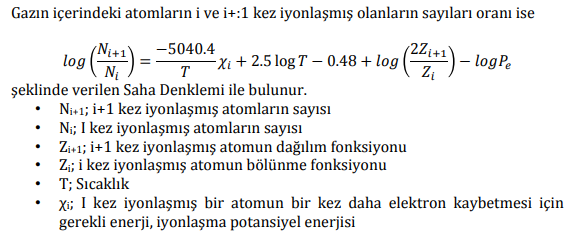

In [ ]:
def saha_equation(t, chi, z, p_e):
    result1 = 10**((-5040.4/t)*chi + 2.5*np.log10(t) - 0.48 + np.log10(2*z) - np.log10(p_e))
    return result1

In [ ]:
t = np.arange(2000, 30001)
t2 = np.arange(2000, 15001)

$\frac{N_{toplam}}{N_{1}} = 1 + \frac{N_2 + N_3}{N_1}$

$\frac{N_{toplam}}{N_{2}} = 1 + \frac{N_1 + N_3}{N_2}$

$\frac{N_{toplam}}{N_{3}} = 1 + \frac{N_1 + N_2}{N_3}$

### Grafik 1

In [ ]:
C_g1, C_g2, C_g3 = 1, 3, 5
C_e1, C_e2, C_e3 = 8.46, 6, 1

In [ ]:
c_n12, c_n13 = boltzman_equation(C_g2, C_g1, C_e2, C_e1, t), boltzman_equation(C_g3, C_g1, C_e3, C_e1, t)
c_n21, c_n23 = boltzman_equation(C_g1, C_g2, C_e1, C_e2, t), boltzman_equation(C_g3, C_g2, C_e3, C_e2, t)
c_n31, c_n32 = boltzman_equation(C_g1, C_g3, C_e1, C_e3, t), boltzman_equation(C_g2, C_g3, C_e2, C_e3, t)

In [ ]:
C_n1 = (1 + c_n12 + c_n13)**-1
C_n2 = (1 + c_n21 + c_n23)**-1
C_n3 = (1 + c_n31 + c_n32)**-1

In [ ]:
fig, axs = plt.subplots(figsize=(12,5))
axs.set_title('''Boltazman Denklemi "C"''', fontsize= 18)
axs.plot(t, C_n1, 'b', label = 'N1/NT')
axs.plot(t, C_n2, 'k', label = 'N2/NT')
axs.plot(t, C_n3, 'r', label = 'N3/NT')
axs.set_ylabel('N/N$_{Toplam}$', fontsize=14)
axs.set_xlabel('Sıcaklık [K]', fontsize=14)
axs.grid(True)
axs.legend()
#plt.savefig(fname='figure_1.png', facecolor="white")
plt.show()

### Grafik 2

In [ ]:
H_g1, H_g2, H_g3 = 2, 8, 18
H_e1, H_e2, H_e3 = 13.6, 3.4, 1.51

In [ ]:
h_n12, h_n13 = boltzman_equation(H_g2, H_g1, H_e2, H_e1, t), boltzman_equation(H_g3, H_g1, H_e3, H_e1, t)
h_n21, h_n23 = boltzman_equation(H_g1, H_g2, H_e1, H_e2, t), boltzman_equation(H_g3, H_g2, H_e3, H_e2, t)
h_n31, h_n32 = boltzman_equation(H_g1, H_g3, H_e1, H_e3, t), boltzman_equation(H_g2, H_g3, H_e2, H_e3, t)

In [ ]:
H_n1 = (1 + h_n12 + h_n13)**-1
H_n2 = (1 + h_n21 + h_n23)**-1
H_n3 = (1 + h_n31 + h_n32)**-1

In [ ]:
fig, axs = plt.subplots(figsize=(12,5))
axs.set_title('''Boltazman Denklemi "H"''', fontsize= 18)
#axs.plot(t, H_n1, 'b', label = 'N1/NT')
axs.plot(t, H_n2, 'k', label = 'N2/NT')
axs.plot(t, H_n3, 'r', label = 'N3/NT')
axs.set_ylabel('N/N$_{Toplam}$', fontsize=14)
axs.set_xlabel('Sıcaklık [K]', fontsize=14)
axs.grid(True)
axs.legend()
plt.savefig(fname='figure_10.png', facecolor="white")
plt.show()

### Grafik 3

In [ ]:
Ca_e1, Ca_e2 = 6.09, 11.82
z_10, z_21 = 2.51, 0.56
p_e =0.2

In [ ]:
Ca_n1= (1 + saha_equation(t2, Ca_e1, z_21, p_e)**-1)**-1
Ca_n2= (1 + saha_equation(t2, Ca_e2, z_21, p_e)**-1)**-1

In [ ]:
fig, axs = plt.subplots(figsize=(12,5))
axs.set_title('''Saha Denklemi "Ca" (P$\epsilon$= 20 dyn cm$^{-2}$)''', fontsize= 18)
axs.plot(t2, Ca_n1, 'b', label = 'NI/NT')
axs.plot(t2, Ca_n2, 'r', label = 'NII/NT')
axs.set_ylabel('N/N$_{Toplam}$', fontsize=14)
axs.set_xlabel('Sıcaklık [K]', fontsize=14)
axs.set_ylim(0,1)
axs.grid(True)
axs.legend()
#plt.savefig(fname='figure_3.png', facecolor="white")
plt.show()

### Grafik 4

In [ ]:
p_e2 = 0.02
Ca_n12= (1 + saha_equation(t2, Ca_e1, z_21, p_e2)**-1)**-1
Ca_n22= (1 + saha_equation(t2, Ca_e2, z_21, p_e2)**-1)**-1

In [ ]:
fig, axs = plt.subplots(figsize=(12,5))
axs.set_title('''Saha Denklemi "Ca" (P$\epsilon$= 2 dyn cm$^{-2}$)''', fontsize= 18)
axs.plot(t2, Ca_n12, 'b', label = 'NI/NT')
axs.plot(t2, Ca_n22, 'r', label = 'NII/NT')
axs.set_ylabel('N/N$_{Toplam}$', fontsize=14)
axs.set_xlabel('Sıcaklık [K]', fontsize=14)
axs.set_ylim(0,1)
axs.grid(True)
axs.legend()
#plt.savefig(fname='figure_4.png', facecolor="white")
plt.show()

### Grafik 5 

In [ ]:
fig, axs = plt.subplots(figsize=(12,5))
axs.set_title('''Saha Denklemi "Ca" Karşılaştırma''', fontsize= 18)
axs.plot(t2, Ca_n1, 'b', label = 'NI/NT (P$\epsilon$= 20 dyncm$^{-2}$)')
axs.plot(t2, Ca_n12, 'b--', label = 'NI/NT (P$\epsilon$= 2 dyncm$^{-2}$)')
axs.legend()
axs.plot(t2, Ca_n2, 'r', label = 'NI/NT (P$\epsilon$= 20 dyncm$^{-2}$)')
axs.plot(t2, Ca_n22, 'r--', label = 'NI/NT (P$\epsilon$= 2 dyncm$^{-2}$)')
axs.set_ylabel('N/N$_{Toplam}$', fontsize=14)
axs.set_xlabel('Sıcaklık [K]', fontsize=14)
axs.set_ylim(0,1)
axs.grid(True)
axs.legend()
#plt.savefig(fname='figure_5.png', facecolor="white")
plt.show()

### Grafik 6

In [ ]:
h_n_21 = boltzman_equation(H_g2, H_g1, H_e2, H_e1, t)
h_n_22 = saha_equation(t, H_e1, 0.5, 0.2)

In [ ]:
H_alpha = (h_n_21 /(1+h_n_21)) * (1/(1+h_n_22))

In [ ]:
fig, axs = plt.subplots(figsize=(12,5))
axs.set_title('H$_α$ Parçacık Oranı', fontsize = 18)
axs.plot(t, H_alpha, 'r', label = 'N2/NT')
axs.set_ylabel('N$_2$/N$_{Toplam}$', fontsize=14)
axs.set_xlabel('Sıcaklık [K]', fontsize=14)
axs.set_ylim(0)
axs.set_xlim(4000, 22000, 2000)
axs.grid(True)
axs.legend()
#plt.savefig(fname='figure_6.png', facecolor="white")
plt.show()

### Grafik 7

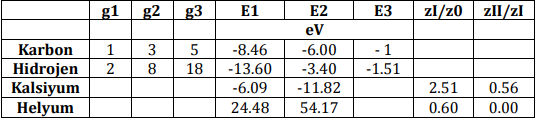

In [ ]:
He_e1, He_e2 = 24.48, 54.17
He_z1, He_z2 = 0.6, 0

In [ ]:
He_n01 = (1 + saha_equation(t2, He_e1, He_z1, p_e)**-1)**-1
#He_n12 = (1 + saha_equation(t2, He_e1, He_z2, p_e)**-1)**-1 #
#He_n22 = (1 + saha_equation(t2, He_e2, He_z1, p_e))**-1

In [ ]:
fig, axs = plt.subplots(figsize=(12,5))
axs.set_title('''Saha Denklemi "He"''', fontsize= 18)
axs.plot(t2, He_n01, 'r', label = 'N0/NT')
axs.set_ylabel('N$_0$/N$_{Toplam}$', fontsize=14)
axs.set_xlabel('Sıcaklık [K]', fontsize=14)
axs.set_ylim(0)
axs.grid(True)
axs.legend()
#plt.savefig(fname='figure_11.png', facecolor="white")
plt.show()

### Grafik 8

In [ ]:
Ca_n2= (1 + saha_equation(t, Ca_e2, z_21, p_e)**-1)**-1
He_n01 = (1 + saha_equation(t, He_e1, He_z1, p_e)**-1)**-1
h_n_22 = (1 + saha_equation(t, H_e1, 0.5, p_e)**-1)**-1

In [ ]:
fig, axs = plt.subplots(figsize=(12,5))
axs.set_title('''Saha Denklemi "H,Ca ve He" Karşılaştırma''', fontsize= 18)
axs.plot(t, h_n_22, 'b', label = 'H (NII/NT$)')
axs.plot(t, Ca_n2, 'k', label = 'Ca (NII/NT)')
axs.plot(t, He_n01, 'r', label = 'He (N0/NT)')
axs.set_ylabel('N/N$_{Toplam}$', fontsize=14)
axs.set_xlabel('Sıcaklık [K]', fontsize=14)
axs.grid(True)
axs.legend()
#plt.savefig(fname='figure_12.png', facecolor="white")
plt.show()